In [ ]:
import numpy as np
import csv

object_tracking_masks_01 = np.load('results/9953_Act_01_Object_Tracking_2fps/trajectories/9953_Act_01_Object_Tracking_2fps.npy')
object_tracking_masks_02 = np.load('results/9953_Act_02_Object_Tracking_2fps/trajectories/9953_Act_02_Object_Tracking_2fps.npy')
object_tracking_masks_03 = np.load('results/9953_Act_03_Object_Tracking_2fps/trajectories/9953_Act_03_Object_Tracking_2fps.npy')

hand_tracking_masks_01 = np.load('results/9953_Act_01_Hand_Tracking_2fps/trajectories/9953_Act_01_Hand_Tracking_2fps.npy')
hand_tracking_masks_02 = np.load('results/9953_Act_02_Hand_Tracking_2fps/trajectories/9953_Act_02_Hand_Tracking_2fps.npy')
hand_tracking_masks_03 = np.load('results/9953_Act_03_Hand_Tracking_2fps/trajectories/9953_Act_03_Hand_Tracking_2fps.npy')      

assert object_tracking_masks_01.shape[0] == hand_tracking_masks_01.shape[0]
assert object_tracking_masks_02.shape[0] == hand_tracking_masks_02.shape[0]
assert object_tracking_masks_03.shape[0] == hand_tracking_masks_03.shape[0]


def convert_frames_to_hhmmss(marked_frames, cropped_fps=2):
    frame_time_mapping = {}
    for frame in marked_frames:
        # convert frame to seconds
        total_seconds = frame / cropped_fps
        # convert seconds to hh:mm:ss
        hours = int(total_seconds // 3600)
        minutes = int((total_seconds % 3600) // 60)
        seconds = total_seconds % 60
        time_str = f"{hours:02}:{minutes:02}:{int(seconds):02}"  
        frame_time_mapping[frame] = time_str
    return frame_time_mapping

In [ ]:
results = []
for i in range(0, 3600):
    if i < 1200:
        overlap = np.any(np.logical_and(object_tracking_masks_01[i], hand_tracking_masks_01[i]))
        if overlap:
            results.append(i)
    if i >= 1200 and i < 2400:
        overlap = np.any(np.logical_and(object_tracking_masks_02[i-1200], hand_tracking_masks_02[i-1200]))
        if overlap:
            results.append(i)
    if i >= 2400:
        overlap = np.any(np.logical_and(object_tracking_masks_03[i-2400], hand_tracking_masks_03[i-2400]))
        if overlap:
            results.append(i)
            
print(results)

timepoints = convert_frames_to_hhmmss(results)

output_csv_path = 'results/9953_Act_Overlap/results.csv'
with open(output_csv_path, mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Frame', 'Time'])
    for frame, time in timepoints.items():
        writer.writerow([frame, time])

In [ ]:
import numpy as np

def detect_area_reduction(current_mask, previous_mask, reduction_threshold=0.3):
    current_area = np.sum(current_mask > 0)
    previous_area = np.sum(previous_mask > 0)

    if previous_area == 0:
        return False

    reduction_ratio = (previous_area - current_area) / previous_area
    return reduction_ratio > reduction_threshold

results = []
reduction_threshold = 0.1

previous_object_mask_01 = object_tracking_masks_01[0, 0]

for i in range(0, 3600):
    if i < 1200:
        current_object_mask = object_tracking_masks_01[i, 0]
        hand_mask = hand_tracking_masks_01[i, 0]

        area_reduction_detected = detect_area_reduction(current_object_mask, previous_object_mask_01, reduction_threshold)
        
        overlap_detected = np.any(np.logical_and(current_object_mask > 0, hand_mask > 0))
        
        if area_reduction_detected or overlap_detected:
            results.append(i)
        
        previous_object_mask_01 = current_object_mask

    elif 1200 <= i < 2400:
        if i == 1200:
            previous_object_mask_02 = object_tracking_masks_02[0, 0]
        current_object_mask = object_tracking_masks_02[i - 1200, 0]
        hand_mask = hand_tracking_masks_02[i - 1200, 0]

        area_reduction_detected = detect_area_reduction(current_object_mask, previous_object_mask_02, reduction_threshold)
        overlap_detected = np.any(np.logical_and(current_object_mask > 0, hand_mask > 0))

        if area_reduction_detected or overlap_detected:
            results.append(i)
        
        previous_object_mask_02 = current_object_mask

    else:
        if i == 2400:
            previous_object_mask_03 = object_tracking_masks_03[0, 0]
        current_object_mask = object_tracking_masks_03[i - 2400, 0]
        hand_mask = hand_tracking_masks_03[i - 2400, 0]

        area_reduction_detected = detect_area_reduction(current_object_mask, previous_object_mask_03, reduction_threshold)
        overlap_detected = np.any(np.logical_and(current_object_mask > 0, hand_mask > 0))

        if area_reduction_detected or overlap_detected:
            results.append(i)
        
        previous_object_mask_03 = current_object_mask
        
print (results)

timepoints = convert_frames_to_hhmmss(results)

output_csv_path = 'results/9953_Act_Overlap/results.csv'
with open(output_csv_path, mode='w') as file:
    writer = csv.writer(file)
    writer.writerow(['Frame', 'Time'])
    for frame, time in timepoints.items():
        writer.writerow([frame, time])

In [ ]:
def calculate_object_sizes(object_masks):
    sizes = []
    for frame in object_masks:
        mask = frame[0]
        size = np.sum(mask > 0)
        sizes.append(size)
    return sizes


object_sizes_01 = calculate_object_sizes(object_tracking_masks_01)
object_sizes_02 = calculate_object_sizes(object_tracking_masks_02)
object_sizes_03 = calculate_object_sizes(object_tracking_masks_03)

print("Act_01 Object Sizes:", object_sizes_01)
print("Act_02 Object Sizes:", object_sizes_02)
print("Act_03 Object Sizes:", object_sizes_03)

average_size_01 = np.mean(object_sizes_01)
average_size_02 = np.mean(object_sizes_02)
average_size_03 = np.mean(object_sizes_03)

print("Act_01 Average Size:", average_size_01)
print("Act_02 Average Size:", average_size_02)
print("Act_03 Average Size:", average_size_03)

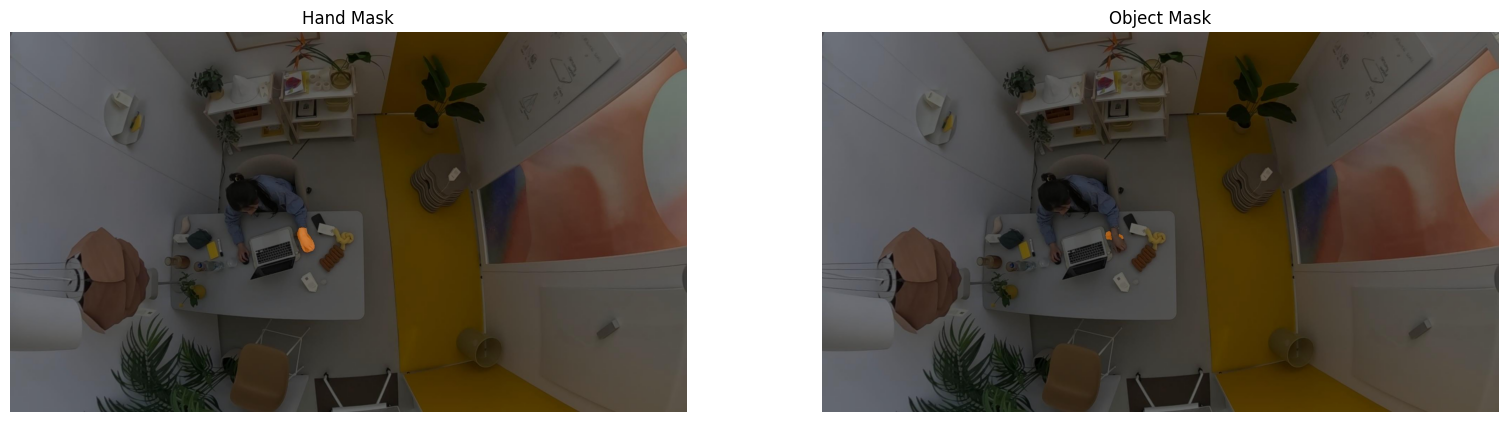

In [ ]:
import matplotlib.pyplot as plt
import os

# Define directories for the masks
hand_mask_dirs = [
    'results/9953_Act_01_Hand_Tracking_2fps/masks',
    'results/9953_Act_02_Hand_Tracking_2fps/masks',
    'results/9953_Act_03_Hand_Tracking_2fps/masks'
]

object_mask_dirs = [
    'results/9953_Act_01_Object_Tracking_2fps/masks',
    'results/9953_Act_02_Object_Tracking_2fps/masks',
    'results/9953_Act_03_Object_Tracking_2fps/masks'
]

# Extract frames for each act
frames_per_act = 1200
frame = 2856
act_idx = frame // frames_per_act  # Determine which act
frame_idx = frame % frames_per_act  # Frame index within the act
    
# Construct file paths for the masks
hand_mask_path = os.path.join(hand_mask_dirs[act_idx], f'{frame_idx:06d}.jpg')
object_mask_path = os.path.join(object_mask_dirs[act_idx], f'{frame_idx:06d}.jpg')

# Load images
hand_mask = plt.imread(hand_mask_path)
object_mask = plt.imread(object_mask_path)
    
# Display the images
plt.figure(figsize=(19.2, 10.8))
    
# Show hand mask
plt.subplot(1, 2, 1)
plt.imshow(hand_mask, cmap='gray')
plt.title(f'Hand Mask')
plt.axis('off')
    
# Show object mask
plt.subplot(1, 2, 2)
plt.imshow(object_mask, cmap='gray')
plt.title(f'Object Mask')
plt.axis('off')
    
plt.show()
# Iterate over all results to display corresponding frames
    

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
time_ranges = [["00:19:13", "00:19:16"], ["00:20:14", "00:20:17"], ["00:20:33", "00:20:37"], ["00:21:04", "00:21:30"], ["00:22:50", "00:22:59"], ["00:23:04", "00:23:26"] , ["00:23:32", "00:23:55"], ["00:29:47", "00:29:59"]]

def generate_time_intervals(time_ranges, output_csv):
    all_times = []

    for start_time, end_time in time_ranges:
        try:
            start = datetime.strptime(start_time, "%H:%M:%S")
            end = datetime.strptime(end_time, "%H:%M:%S")
        except ValueError:
            print(f"Time format error, please use HH:MM:SS format! Start: {start_time}, End: {end_time}")
            continue

        # Ensure end time is greater than start time
        if end <= start:
            print(f"End time must be greater than start time! Start: {start_time}, End: {end_time}")
            continue

        # Generate time points for each second
        current = start
        while current <= end:
            all_times.append(current.strftime("%H:%M:%S"))
            current += timedelta(seconds=1)

    # unique and sort times
    unique_times = sorted(set(all_times))

    # Save to CSV file
    df = pd.DataFrame(unique_times, columns=["Time"])
    df.to_csv(output_csv, index=False)
    print(f"All per-second time points for the specified intervals have been saved to {output_csv}")
    
output_csv = 'results/9953_Act_Overlap/real_times.csv'  
generate_time_intervals(time_ranges, output_csv)

所有时间段的每秒时间点已保存到 results/9953_Act_Overlap/real_times.csv


In [ ]:
df = pd.read_csv('/home/ipd/Scripts/SAM2/results/9953_Act_Overlap/results.csv')
unique_times = df['Time'].drop_duplicates().reset_index(drop=True)
print(unique_times)
unique_times.name = "Time"
unique_times.to_csv('/home/ipd/Scripts/SAM2/results/9953_Act_Overlap/unique_times.csv', index=False)

0      00:19:03
1      00:19:04
2      00:19:05
3      00:19:06
4      00:19:07
         ...   
177    00:29:55
178    00:29:56
179    00:29:57
180    00:29:58
181    00:29:59
Name: Time, Length: 182, dtype: object


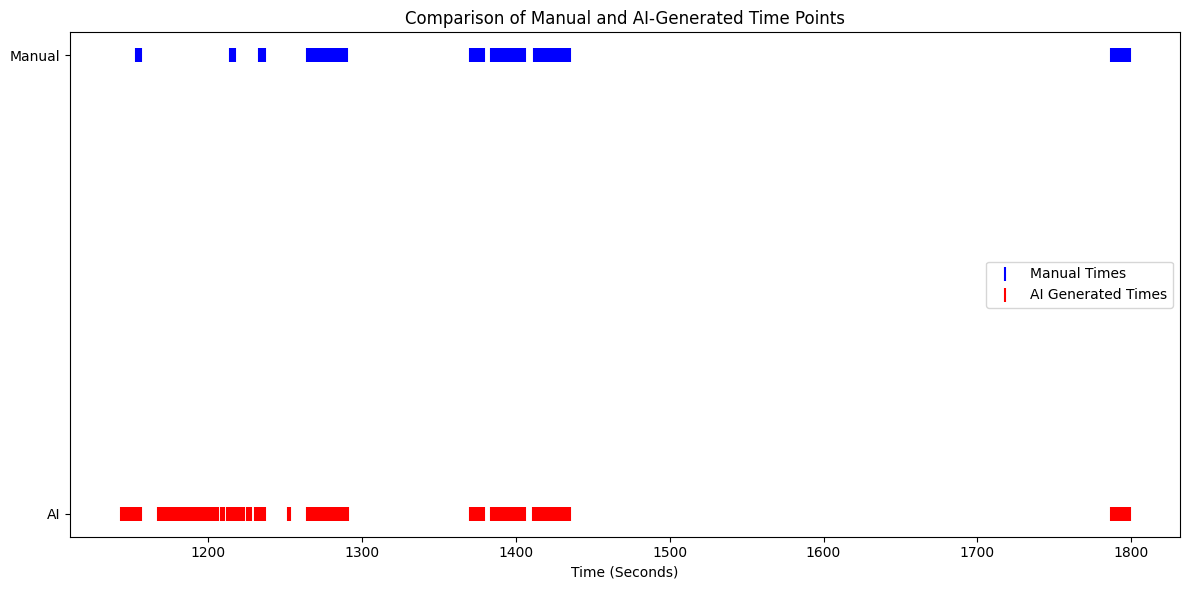

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def time_to_seconds(time_str):
    t = datetime.strptime(time_str, "%H:%M:%S")
    return t.hour * 3600 + t.minute * 60 + t.second

# Read CSV files
manual_csv = "/home/ipd/Scripts/SAM2/results/9953_Act_Overlap/real_times.csv"  # 手动标注时间 CSV 文件路径
ai_csv = "/home/ipd/Scripts/SAM2/results/9953_Act_Overlap/unique_times.csv"  # AI 生成时间 CSV 文件路径

manual_df = pd.read_csv(manual_csv)
ai_df = pd.read_csv(ai_csv)

# Convert times to seconds
manual_df["Seconds"] = manual_df["Time"].apply(time_to_seconds)
ai_df["Seconds"] = ai_df["Time"].apply(time_to_seconds)

# Plot comparison
plt.figure(figsize=(12, 6))

plt.scatter(manual_df["Seconds"], [1] * len(manual_df), color="blue", label="Manual Times", marker="|", s=100)

plt.scatter(ai_df["Seconds"], [0] * len(ai_df), color="red", label="AI Generated Times", marker="|", s=100)

plt.yticks([0, 1], ["AI", "Manual"])
plt.xlabel("Time (Seconds)")
plt.title("Comparison of Manual and AI-Generated Time Points")
plt.legend()

plt.tight_layout()
plt.show()